In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential , Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D , Dropout , AveragePooling1D ,Input  , concatenate , LSTM , LeakyReLU , BatchNormalization
from tensorflow import unique
from sklearn.metrics import confusion_matrix
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from scipy.fftpack import fft
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data=pd.read_csv('/kaggle/input/fyp-dataset/5dB_12Schemes.csv',header= None)
print("Read Complete")

Read Complete


In [4]:
print(data.shape)



(13387, 3001)


In [5]:
print( data.iloc[:,-1] )

0        QAM-16
1        QAM-16
2        QAM-16
3        QAM-16
4        QAM-16
          ...  
13382    FSK-32
13383    FSK-32
13384    FSK-32
13385    FSK-32
13386    FSK-32
Name: 3000, Length: 13387, dtype: object


In [6]:
Label = data.iloc[:,-1]
print(Label)

0        QAM-16
1        QAM-16
2        QAM-16
3        QAM-16
4        QAM-16
          ...  
13382    FSK-32
13383    FSK-32
13384    FSK-32
13385    FSK-32
13386    FSK-32
Name: 3000, Length: 13387, dtype: object


In [7]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 3000
data.iloc[:,-1] =  label_encoder.fit_transform(Label) 


/tmp/ipykernel_31/1734690138.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,-1] =  label_encoder.fit_transform(Label)


In [8]:
print(label_encoder.classes_)  # The index of the label in le.classes_ is the encoded value of the label.

['BPSK' 'FSK-16' 'FSK-2' 'FSK-32' 'FSK-4' 'FSK-8' 'QAM-128' 'QAM-16'
 'QAM-256' 'QAM-32' 'QAM-64' 'QPSK']


In [9]:
TotalLabel = len(list(label_encoder.classes_))

print("Total Number of Dense Layer ouputs:" , TotalLabel)

Total Number of Dense Layer ouputs: 12


In [10]:
new_data = data
print(new_data)

           0         1         2         3         4         5         6     \
0      0.031617 -0.067080  0.903714 -0.142399  0.003876  0.249397  0.726127   
1      0.016724  0.105625  0.389050  0.022462 -0.390057  0.346232  0.886593   
2      0.038057 -0.135166  0.467208  0.192877 -0.193335 -0.052278  0.596728   
3     -0.049654  0.126743 -0.571123  0.485580  0.750511 -0.481796 -0.801569   
4      0.128086 -0.052980 -0.620960  0.173162 -0.516923  0.182470  0.345500   
...         ...       ...       ...       ...       ...       ...       ...   
13382  1.000000 -0.913175  0.259987 -0.377178  0.308969 -0.679220  0.082247   
13383 -0.477218  1.000000 -1.000000  1.000000 -0.833399  1.000000  0.084597   
13384 -0.195624  0.826563 -0.983764  0.037202 -0.209387  1.000000 -0.435286   
13385 -0.680197  1.000000 -0.421705 -0.250252 -0.543229 -0.528611 -0.717551   
13386 -0.220557 -0.214698 -1.000000 -0.222968 -1.000000 -0.362438 -0.385357   

           7         8         9     ...      2991 

In [11]:

new_data = new_data.interpolate()

  

In [12]:
print(new_data.isnull().sum().sum())
print(new_data.shape)



0
(13387, 3001)


In [13]:
x= new_data.iloc[:,0:-1]
y= new_data.iloc[:, new_data.shape[1]-1 ]
print("Shape of x:" , x.shape)
print("Shape of y:" , y.shape)


Shape of x: (13387, 3000)
Shape of y: (13387,)


In [14]:
# # from skimage.restoration import  denoise_wavelet 
new_CSV = []
from scipy.signal import savgol_filter
for row in x:
  x_denoise = savgol_filter(x[row] ,1001,3)
  new_CSV.append(x_denoise)

print(len(new_CSV))
new_CSV = pd.DataFrame(new_CSV)
print(new_CSV.shape)
new_CSV1 = new_CSV.T
print(new_CSV1.shape)


3000
(3000, 13387)
(13387, 3000)


In [15]:


td_x = new_CSV1.iloc[:,:]
fd_x = abs(fft(td_x))
x = np.vstack((td_x,fd_x ))
print(x.shape)
y1 = np.hstack((y,y))
print(y1.shape)


# x = new_CSV1.iloc[:,:]
# x = x.values.reshape(x.shape[0], x.shape[1], 1)
x = x.reshape(x.shape[0], x.shape[1], 1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y1, train_size=0.90)
print("X train shape:" , X_train.shape)
print("Y train shape:" ,Y_train.shape)
print("X test shape:" ,X_test.shape)
print("Y test shape:" ,Y_test.shape)


(26774, 3000)
(26774,)
X train shape: (24096, 3000, 1)
Y train shape: (24096,)
X test shape: (2678, 3000, 1)
Y test shape: (2678,)


In [16]:
#1DCNN
inputs1 = Input(shape=(X_train.shape[1] , 1))
conv1 = Conv1D(filters=64, kernel_size=1, strides=1, activation='relu')(inputs1)
pool1 = MaxPooling1D(pool_size=2, strides=2)(conv1)
#Autoencoder
# Define the encoder architecture
inputs2 = Input(shape=(X_train.shape[1], 1))
x = Dense(128, activation='relu')(inputs2)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)
# Define decoder architecture
x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(1, activation='sigmoid')(x)
#LSTM
inputs3 = Input(shape=(X_train.shape[1], 1))
lstm = LSTM(64)(inputs3)

flatten1 = Flatten()(pool1)
flatten2 = Flatten()(decoded)
flatten3 = Flatten()(lstm)

dense1 = Dense(64, activation = 'relu')(flatten1)
dense2 = Dense(64, activation = 'relu')(flatten2)
dense3 = Dense(64, activation = 'relu')(flatten3)

# merged = concatenate([flatten1, flatten2, flatten3])
merged = concatenate([dense1, dense2, dense3])

dense4 = Dense(12, activation = 'softmax')(merged)

model_n = Model(inputs = [inputs1, inputs2, inputs3], outputs = dense4)
model_n.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
history = model_n.fit([X_train , X_train , X_train], Y_train, batch_size=16, epochs=20, verbose=1, validation_split=0.30) 
model_n.summary()


Epoch 1/20
1055/1055 [==============================] - 109s 90ms/step - loss: 0.9075 - accuracy: 0.6902 - val_loss: 0.2805 - val_accuracy: 0.8974
Epoch 2/20
1055/1055 [==============================] - 94s 89ms/step - loss: 0.2208 - accuracy: 0.9157 - val_loss: 0.1581 - val_accuracy: 0.9452
Epoch 3/20
1055/1055 [==============================] - 94s 89ms/step - loss: 0.1523 - accuracy: 0.9405 - val_loss: 0.1315 - val_accuracy: 0.9488
Epoch 4/20
1055/1055 [==============================] - 100s 95ms/step - loss: 0.1280 - accuracy: 0.9514 - val_loss: 0.1243 - val_accuracy: 0.9520
Epoch 5/20
1055/1055 [==============================] - 94s 89ms/step - loss: 0.1102 - accuracy: 0.9580 - val_loss: 0.1215 - val_accuracy: 0.9555
Epoch 6/20
1055/1055 [==============================] - 101s 96ms/step - loss: 0.1059 - accuracy: 0.9618 - val_loss: 0.1045 - val_accuracy: 0.9615
Epoch 7/20
1055/1055 [==============================] - 100s 95ms/step - loss: 0.0950 - accuracy: 0.9648 - val_loss: 0.10

In [17]:
from sklearn import metrics

loss, accuracy = model_n.evaluate([X_train , X_train , X_train], Y_train)
print("Accuracy:", accuracy)

Y_pred = model_n.predict([X_test,X_test,X_test])
Y_pred_classes = np.argmax(Y_pred,axis = 1)
precision = metrics.precision_score(Y_test, Y_pred_classes, average='weighted')
print("Precision:", precision)

recall = metrics.recall_score(Y_test, Y_pred_classes, average='weighted')
print("Recall:", recall)

f1_score = metrics.f1_score(Y_test, Y_pred_classes, average='weighted')
print("F1 Score:", f1_score)



753/753 [==============================] - 33s 43ms/step - loss: 0.0650 - accuracy: 0.9777
Accuracy: 0.9777141213417053
84/84 [==============================] - 4s 43ms/step
Precision: 0.975385005713042
Recall: 0.9749813293502614
F1 Score: 0.9749746906669589


In [18]:

import time

# Compute inference time per sample
start_time = time.time()
y_pred = model_n.predict([X_test,X_test,X_test])
end_time = time.time()
inference_time = (end_time - start_time) / len(X_test)
print(f"Inference time per sample: {inference_time:.4f} seconds")

# # Compute memory usage during training or inference
# memory_usage((model, X_test))

# Compute RMS and MAE metrics
score = model_n.evaluate([X_train , X_train , X_train], Y_train)
print(f"RMS: {np.sqrt(score[0]):.4f}")
print(f"MAE: {score[1]:.4f}")


# Load the weights for the model from a file (if applicable)
# model.load_weights('model_weights.h5')

# Print the weights for each layer in the model
for layer in model_n.layers:
    if layer.get_weights():
        print(layer.name)
        for weight in layer.weights:
            print(weight.shape)
            print(weight)

84/84 [==============================] - 3s 40ms/step
Inference time per sample: 0.0020 seconds
753/753 [==============================] - 33s 43ms/step - loss: 0.0650 - accuracy: 0.9777
RMS: 0.2549
MAE: 0.9777
dense
(1, 128)
<tf.Variable 'dense/kernel:0' shape=(1, 128) dtype=float32, numpy=
array([[ 2.19377503e-02,  1.16519995e-01, -1.33208603e-01,
        -7.14161899e-03,  5.56341652e-03,  1.03225820e-01,
        -4.08145756e-01, -6.36751831e-01, -5.86670280e-01,
         2.57269293e-01,  1.05433039e-01, -5.20330518e-02,
         4.09528203e-02,  1.87348425e-01,  6.60063699e-03,
         1.98506221e-01, -2.90253200e-02, -4.82560620e-02,
         3.50004435e-01,  3.11854869e-01,  1.24822602e-01,
         6.92529231e-02,  1.96130108e-02,  2.81544656e-01,
         6.94081560e-02,  1.34636715e-01,  1.98969290e-01,
        -4.72189253e-03, -5.43447793e-01,  1.14823259e-01,
         3.19929421e-01, -1.04347669e-01, -1.17571913e-02,
         1.65583268e-01,  2.77697980e-01, -1.20152891e-01,

In [19]:

pred = model_n.predict([X_test,X_test,X_test])
pred_y = pred.argmax(axis=-1)
cm = confusion_matrix(Y_test, pred_y)


  

84/84 [==============================] - 3s 40ms/step


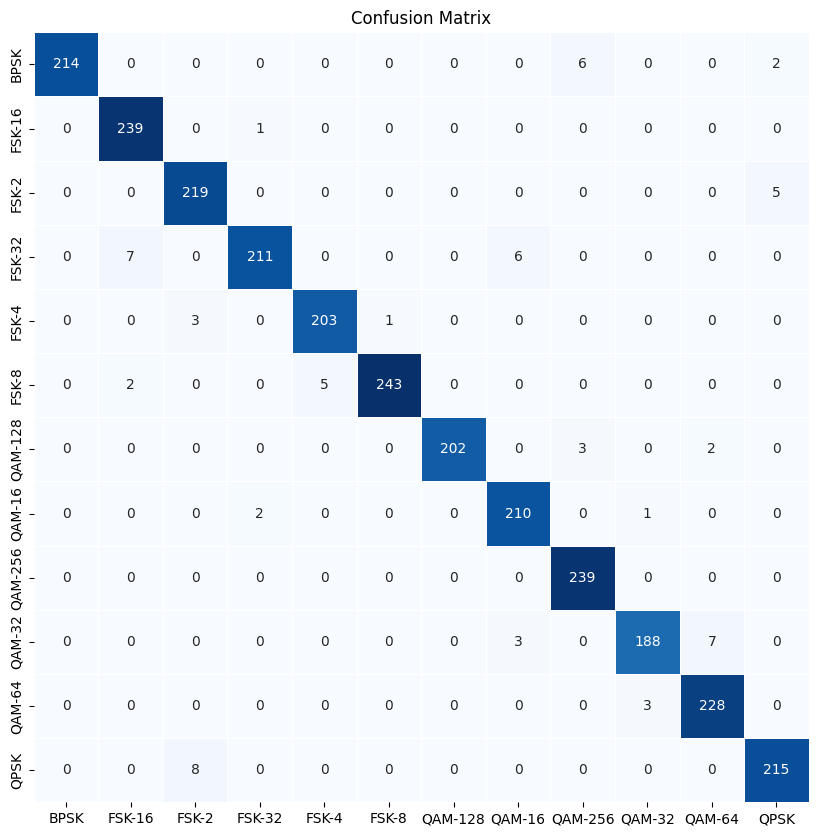

In [20]:
  
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax , cbar=False , linewidths=.5 ,  cmap='Blues' ) ; 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(list(label_encoder.classes_)); 
ax.yaxis.set_ticklabels(list(label_encoder.classes_));


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


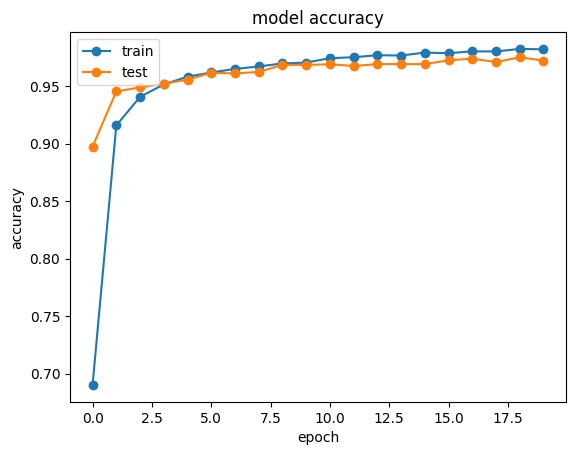

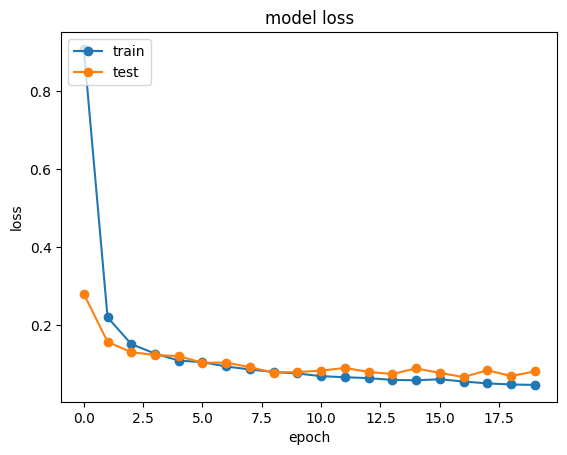

In [21]:
# # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'] , '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("/content/drive/MyDrive/Saved-Model/HM_A.pdf")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'] , '-o')
plt.plot(history.history['val_loss'] , '-o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("/content/drive/MyDrive/Saved-Model/HM_L.pdf")
plt.show()




In [22]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(
    model_n,
    to_file='/kaggle/working/HM.pdf',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=100,
    layer_range=None,
    show_layer_activations=True
)

